In [1]:
#Perceptron training algorithm

In [222]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [474]:
## get random weight vector def randWeight
w0 = (random.uniform(-1/4,1/4))
w1 = random.uniform(-1,1)
w2 = random.uniform(-1,1)
W = np.array([w0,w1,w2])       # weight vector Ω 

In [570]:
# Initialize input vectors def __init__:
def getS(n):
    S  = []                         #collection of input vectors
    for i in range(n):
        x1 = random.uniform(-1,1)   #x-axis
        x2 = random.uniform(-1,1)   #y-axis
        X = np.array([x1,x2])
        S.append(X)
    return S

In [571]:
#Getting S0 and S1 with based on the weight vector def getPointsOnWeights def __init__:
def getTrainingPoint(S,W):
    S0 = []
    S1 = []
    for X in S: 
        if ((([1] + list(X) ) @ W.T) >= 0):   # Checking X @ W.T
            S0.append(X)
        else:
            S1.append(X)
    return S0, S1

In [556]:
def getRandomWeights(a,b):
    w0 = random.uniform(-1/4,-1/4)
    w1 = random.uniform(a,b)
    w2 = random.uniform(a,b)
    W = np.array([w0,w1,w2])       # weight vector Ω 
    return W

In [466]:
def graph(W):
    w0,w1,w2 = W
    x = np.array(range(-1,2))
    figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x, -((w1*x + w0)/w2),label='Boundary')
    xs =[S0[i][0] for i in range(len(S0))]
    ys= [S0[i][1] for i in range(len(S0))]
    plt.scatter(xs,ys,marker="^",label='S0')
    xs =[S1[i][0] for i in range(len(S1))]
    ys= [S1[i][1] for i in range(len(S1))]
    plt.scatter(xs,ys,marker="o",label='S1')
    plt.legend(prop={'size':7.5})
    plt.show()

In [312]:
# activation function
def stepFunction(x):
    if x >= 0:
        return 1
    else:
        return 0

In [557]:
def boolClass(X):
    if list(X) in S1_list:
        return(1)    #positive class
    elif list(X) in S0_list:
        return(0)    #negative class

In [520]:
# Perceptron training algoritm
def weightUpdate(W1,S,rate):
    mis = 0
    for X_ele in S:
        X = np.array([1] + list(X_ele))  # X input vector
        y = stepFunction(W1.T @ X)
        d = boolClass(X_ele)             #desired input
        if (y == 1 and d == 0):
            W1 = W1 - ( rate * X)
            mis += 1
        elif (y == 0 and d == 1):
            W1 = W1 + ( rate * X)
            mis += 1
    return((W1,mis))

In [521]:
# changing no of epochs
def PTA(W1,S,rate):
    mis = -1
    epoch = 0
    misList = []
    while mis != 0:
        W1,mis = weightUpdate(W1,S,rate)
        epoch = epoch + 1
        print("Missclassification = %d" % mis)
        print("epoch %d" % epoch)
        print(W1)
        misList.append(mis)
    return (epoch, misList)

In [528]:
def graphEpochList(epoch,misList):
    plt.plot(np.array(range(epoch)),misList)
    plt.show

In [572]:
def init_t(n,W):
    S = getS(n)
    S0,S1 = getTrainingPoint(S,W)

In [573]:
W = getRandomWeights(-1,1)
init_t(1000,W)
S1_list = [list(a) for a in S1]
S0_list = [list(a) for a in S0]

In [574]:
print("initial weight =")
print(W1)

initial weight =
[ 1.77092361 -5.48338644 -6.62363099]


Missclassification = 19
epoch 1
[ 0.44531    -2.89296264 -2.88626927]
Missclassification = 8
epoch 2
[ 0.44531    -3.02194758 -3.87070011]
Missclassification = 6
epoch 3
[ 0.44531    -3.52243369 -4.05185355]
Missclassification = 1
epoch 4
[ 1.44531    -3.33673964 -4.00380928]
Missclassification = 5
epoch 5
[ 0.44531    -3.8822671  -4.50349287]
Missclassification = 7
epoch 6
[ 1.44531    -3.91314381 -5.2423805 ]
Missclassification = 2
epoch 7
[ 1.44531    -4.47789756 -4.85146729]
Missclassification = 6
epoch 8
[ 1.44531    -4.74828557 -5.23730966]
Missclassification = 4
epoch 9
[ 1.44531    -4.9819076  -5.40739391]
Missclassification = 4
epoch 10
[ 1.44531    -5.21552964 -5.57747815]
Missclassification = 0
epoch 11
[ 1.44531    -5.21552964 -5.57747815]


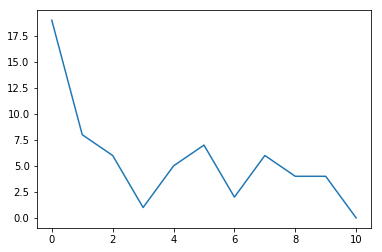

In [560]:
epoch,misList = PTA(W_initial,S,rate=1)
graphEpochList(epoch,misList)

Missclassification = 13
epoch 1
[  9.44531    -17.82705038 -23.80890103]
Missclassification = 10
epoch 2
[  9.44531    -25.71182651 -36.6581367 ]
Missclassification = 4
epoch 3
[  9.44531    -32.08399643 -37.13443824]
Missclassification = 0
epoch 4
[  9.44531    -32.08399643 -37.13443824]


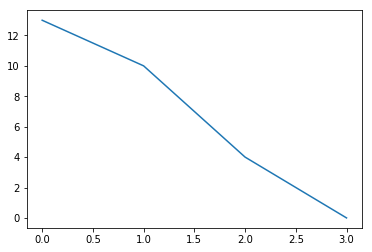

In [561]:
epoch,misList = PTA(W_initial,S,rate=10)
graphEpochList(epoch,misList)

Missclassification = 25
epoch 1
[ 0.14531    -0.42716164 -0.49251355]
Missclassification = 4
epoch 2
[ 0.14531    -0.45052385 -0.50952198]
Missclassification = 4
epoch 3
[ 0.14531    -0.47388605 -0.5265304 ]
Missclassification = 4
epoch 4
[ 0.14531    -0.49724825 -0.54353882]
Missclassification = 4
epoch 5
[ 0.14531    -0.52061046 -0.56054725]
Missclassification = 0
epoch 6
[ 0.14531    -0.52061046 -0.56054725]


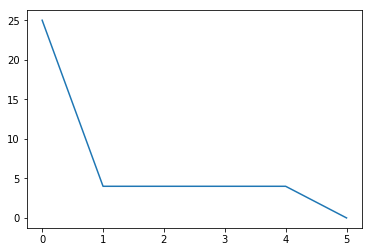

In [562]:
epoch,misList = PTA(W_initial,S,rate=0.1)
graphEpochList(epoch,misList)

In [505]:
W1

array([ 1.77092361, -5.48338644, -6.62363099])

In [506]:
W

array([-0.22250454,  0.82565433,  0.95459674])

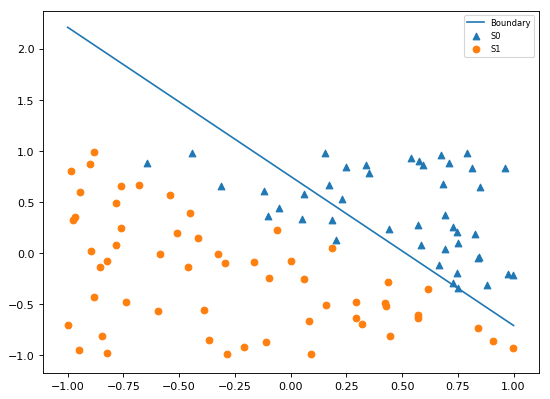

In [575]:
graph(W)

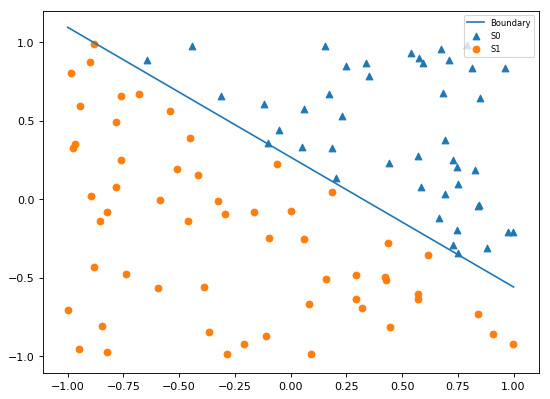

In [565]:
graph(W1)